###Importing Library


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.tree import plot_tree

###Reading The CSV File from GDrive

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")

###Checking the data summary

In [ ]:
print(len(data),"\n")
print(data.shape,"\n")
print(data.isnull().sum().any(),"\n")
print(data.index,"\n")
print(data.columns,"\n")
print(data.info(),"\n")
print(data.count(),"\n")

6819 

(6819, 96) 

False 

RangeIndex(start=0, stop=6819, step=1) 

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       

###Checking the dataset distribution


In [ ]:
data.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data['Bankrupt?'].value_counts()
#The dataset is highly skewed due to the imbalance, thus, oversampling will be considered and the ML algorithms will handle the remaining issues

0    6599
1     220
Name: Bankrupt?, dtype: int64

<Axes: xlabel='Bankrupt?', ylabel='count'>

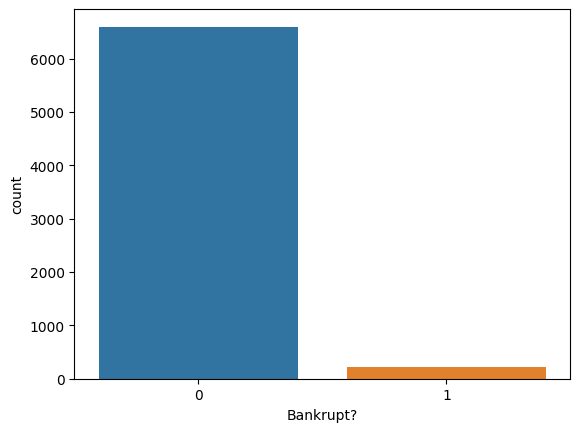

In [ ]:
sns.countplot(x='Bankrupt?', data=data)

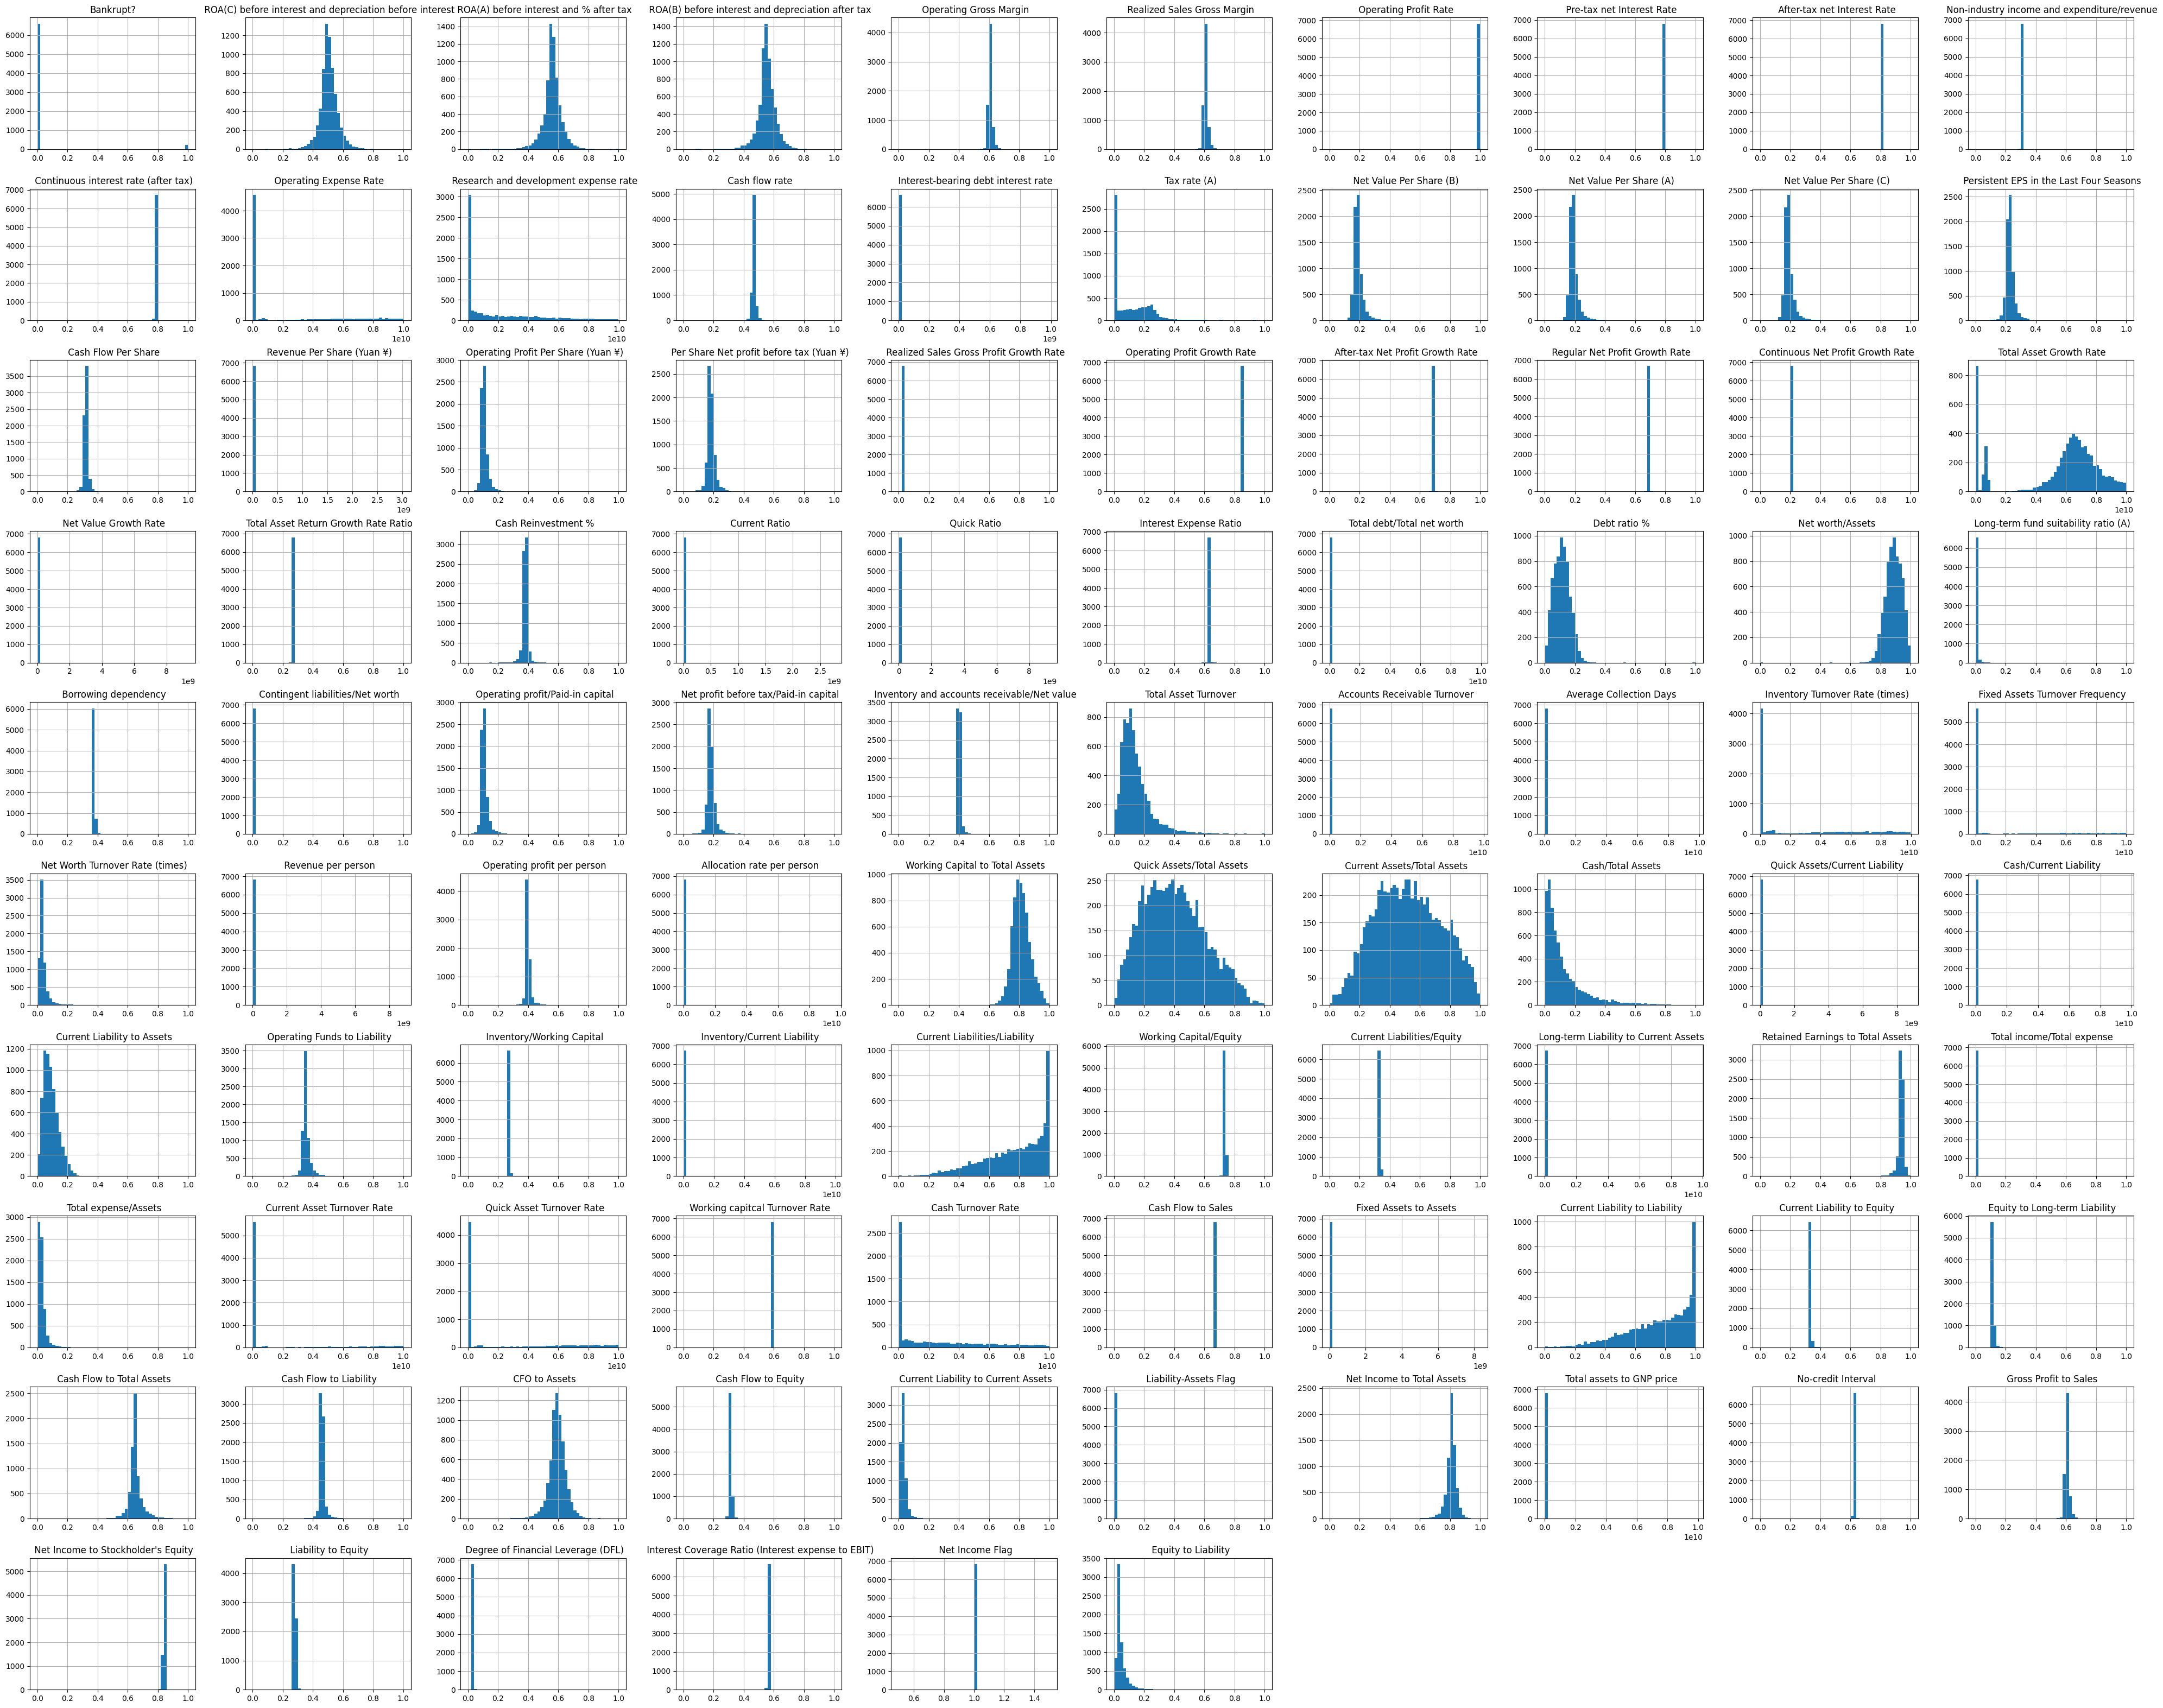

In [ ]:
#Considering the size of our features, bin size of 50 was selected to show 50 features histogram 
data.hist(figsize = (50,40), bins = 50)
plt.show()

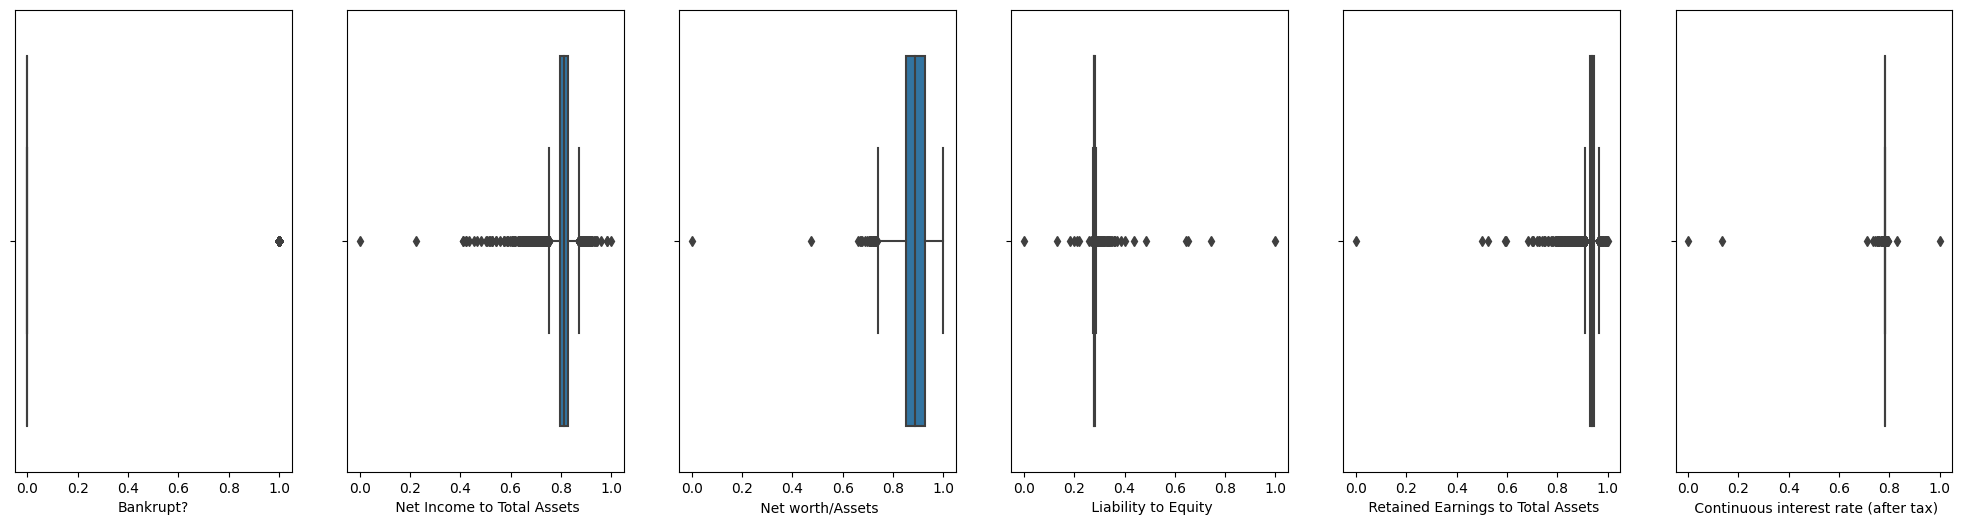

In [ ]:
from matplotlib import axes
f, axes=plt.subplots(ncols=6, figsize=(25,6))
sns.boxplot(x='Bankrupt?', data=data, ax=axes[0])
sns.boxplot(x=' Net Income to Total Assets', data=data, ax=axes[1])
sns.boxplot(x=' Net worth/Assets', data=data, ax=axes[2])
sns.boxplot(x=' Liability to Equity', data=data, ax=axes[3])
sns.boxplot(x=' Retained Earnings to Total Assets', data=data, ax=axes[4])
sns.boxplot(x=' Continuous interest rate (after tax)', data=data, ax=axes[5])

plt.show()

###Checking the statistical summary of the dataset

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


###Checking the features with more correlation with Bankruptcy

In [ ]:
neg_data_corr = data.corr()['Bankrupt?'].sort_values()[:-1].head(8)
neg_data_corr

 Net Income to Total Assets                                -0.315457
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(C) before interest and depreciation before interest   -0.260807
 Net worth/Assets                                          -0.250161
 Persistent EPS in the Last Four Seasons                   -0.219560
 Retained Earnings to Total Assets                         -0.217779
 Net profit before tax/Paid-in capital                     -0.207857
Name: Bankrupt?, dtype: float64

In [ ]:
pos_data_corr = data.corr()['Bankrupt?'].sort_values()[:-1].tail(8)
pos_data_corr

 Current Liability to Equity            0.153828
 Current Liabilities/Equity             0.153828
 Liability to Equity                    0.166812
 Current Liability to Current Assets    0.171306
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Debt ratio %                           0.250161
Bankrupt?                               1.000000
Name: Bankrupt?, dtype: float64

In [ ]:
from numpy.core.fromnumeric import size
import plotly.express as px
data_corr = data.corr()['Bankrupt?'].sort_values()[:-1]
fig = px.bar(data_corr,orientation="h", color_discrete_sequence=["blue"])
fig.show()

###Oversampling method using ADASYN - Adaptive Synthentic Algorithm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Bankrupt?', axis=1), data['Bankrupt?'], test_size=0.2, random_state=42)

In [ ]:
#ADASYN was consider because of its adaptive nature
Oversample = ADASYN(sampling_strategy = 'minority',random_state = 42)
X_train, y_train = Oversample.fit_resample(X=X_train, y=y_train)

<Axes: xlabel='Bankrupt?', ylabel='count'>

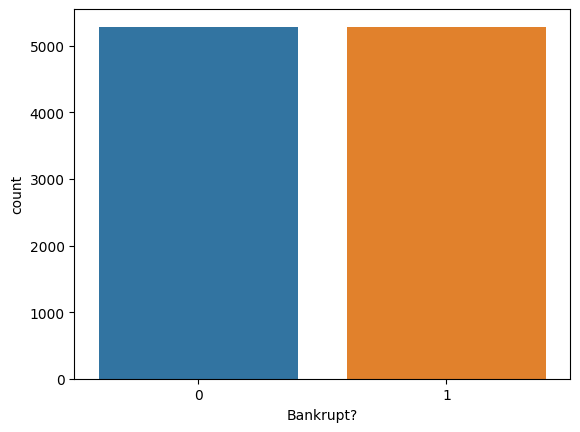

In [ ]:
sns.countplot(data=X_train, x=y_train)

###Machine Learning Models

1.   RandomForest

In [ ]:
#RandomForest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1270   43]
 [  23   28]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1313
           1       0.39      0.55      0.46        51

    accuracy                           0.95      1364
   macro avg       0.69      0.76      0.72      1364
weighted avg       0.96      0.95      0.96      1364



In [ ]:
Accuracy_rf = rf_model.score(X_train, y_train)
print(Accuracy_rf, "\n")
AUC_rf = roc_auc_score(y_test,y_pred)
print(AUC_rf)

1.0 

0.7581350895270522


<Axes: >

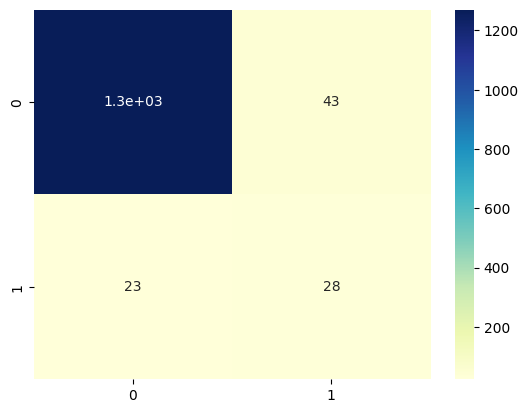

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

[' Liability-Assets Flag', ' Net Income Flag', ' Cash Reinvestment %', ' Working capitcal Turnover Rate', ' Total Asset Return Growth Rate Ratio', ' Operating Funds to Liability', ' CFO to Assets', ' Long-term fund suitability ratio (A)', ' Net Worth Turnover Rate (times)', ' Quick Assets/Current Liability', ' Operating Profit Growth Rate', ' Cash flow rate', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Realized Sales Gross Profit Growth Rate', ' Operating Gross Margin', ' Net Value Per Share (C)', ' Revenue Per Share (Yuan ¥)', ' Working Capital to Total Assets', ' Fixed Assets to Assets', ' Cash Flow Per Share', ' Cash Flow to Total Assets', ' Gross Profit to Sales', ' Working Capital/Equity', ' Current Ratio', ' Tax rate (A)', ' Cash Flow to Equity', ' Net Value Per Share (B)', ' Operating Expense Rate', ' Cash/Current Liability', ' Operating profit/Paid-in capital', ' Cash/Total Assets', ' Current Assets/Total Assets', ' No-credit Interval', ' Realized

Text(0.5, 1.0, 'RF Features_importances')

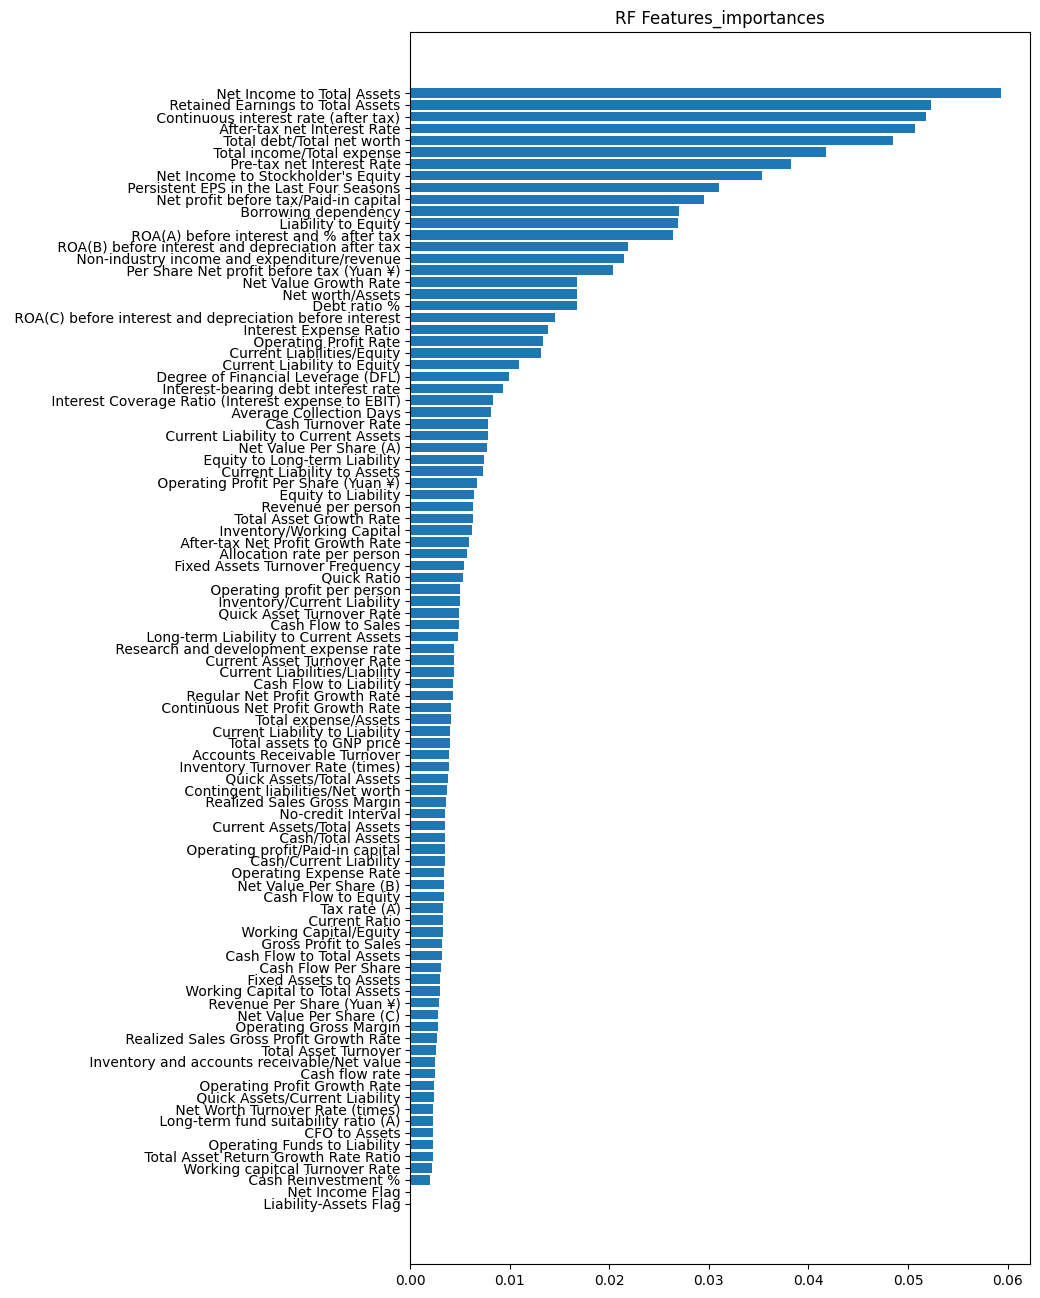

In [ ]:
importances = pd.Series(rf_model.feature_importances_)
features = rf_model.feature_names_in_
features_importances = sorted(zip(importances,features),reverse=True)
keys = [k[1] for k in features_importances ] [::-1]
values = [k[0] for k in features_importances ][::-1]
print(keys,'\n')
print(values,'\n')
print(features_importances,'\n')
fig, ax = plt.subplots(figsize=(8,16))
ax.barh(keys, values)
plt.title('RF Features_importances')

In [ ]:
#Top 20 Importance Features using RF
importances = pd.Series(rf_model.feature_importances_).nlargest(20)
importances

85    0.059304
67    0.052317
9     0.051832
7     0.050653
35    0.048510
68    0.041720
6     0.038276
89    0.035304
18    0.031008
42    0.029546
39    0.026962
90    0.026878
1     0.026420
2     0.021830
8     0.021426
22    0.020408
29    0.016744
37    0.016722
36    0.016722
0     0.014499
dtype: float64

In [ ]:
#RandomForest with OOB

rf_modelwithOOB = RandomForestClassifier(random_state=42, oob_score=True)
rf_modelwithOOB.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
y_pred_rfwithOOB = rf_modelwithOOB.predict(X_test)

print(confusion_matrix(y_test, y_pred_rfwithOOB))
print(classification_report(y_test, y_pred_rfwithOOB))

[[1270   43]
 [  23   28]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1313
           1       0.39      0.55      0.46        51

    accuracy                           0.95      1364
   macro avg       0.69      0.76      0.72      1364
weighted avg       0.96      0.95      0.96      1364



In [ ]:
Accuracy_rfwithOOB = rf_modelwithOOB.score(X_train, y_train)
print(Accuracy_rfwithOOB, "\n")
AUC_rfwithOOB = roc_auc_score(y_test,y_pred_rfwithOOB)
print(AUC_rfwithOOB)

1.0 

0.7581350895270522


<Axes: >

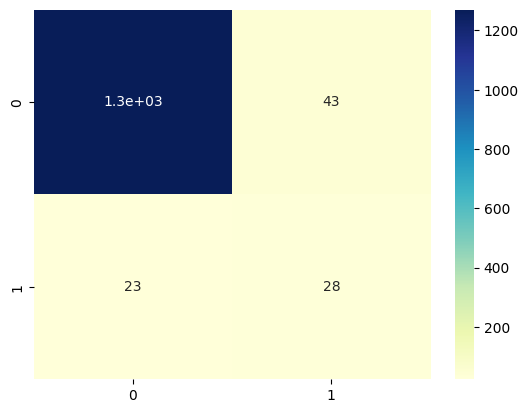

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rfwithOOB), annot=True, cmap="YlGnBu")

[' Liability-Assets Flag', ' Net Income Flag', ' Cash Reinvestment %', ' Working capitcal Turnover Rate', ' Total Asset Return Growth Rate Ratio', ' Operating Funds to Liability', ' CFO to Assets', ' Long-term fund suitability ratio (A)', ' Net Worth Turnover Rate (times)', ' Quick Assets/Current Liability', ' Operating Profit Growth Rate', ' Cash flow rate', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Realized Sales Gross Profit Growth Rate', ' Operating Gross Margin', ' Net Value Per Share (C)', ' Revenue Per Share (Yuan ¥)', ' Working Capital to Total Assets', ' Fixed Assets to Assets', ' Cash Flow Per Share', ' Cash Flow to Total Assets', ' Gross Profit to Sales', ' Working Capital/Equity', ' Current Ratio', ' Tax rate (A)', ' Cash Flow to Equity', ' Net Value Per Share (B)', ' Operating Expense Rate', ' Cash/Current Liability', ' Operating profit/Paid-in capital', ' Cash/Total Assets', ' Current Assets/Total Assets', ' No-credit Interval', ' Realized

Text(0.5, 1.0, 'RFwithOOB Features_importances')

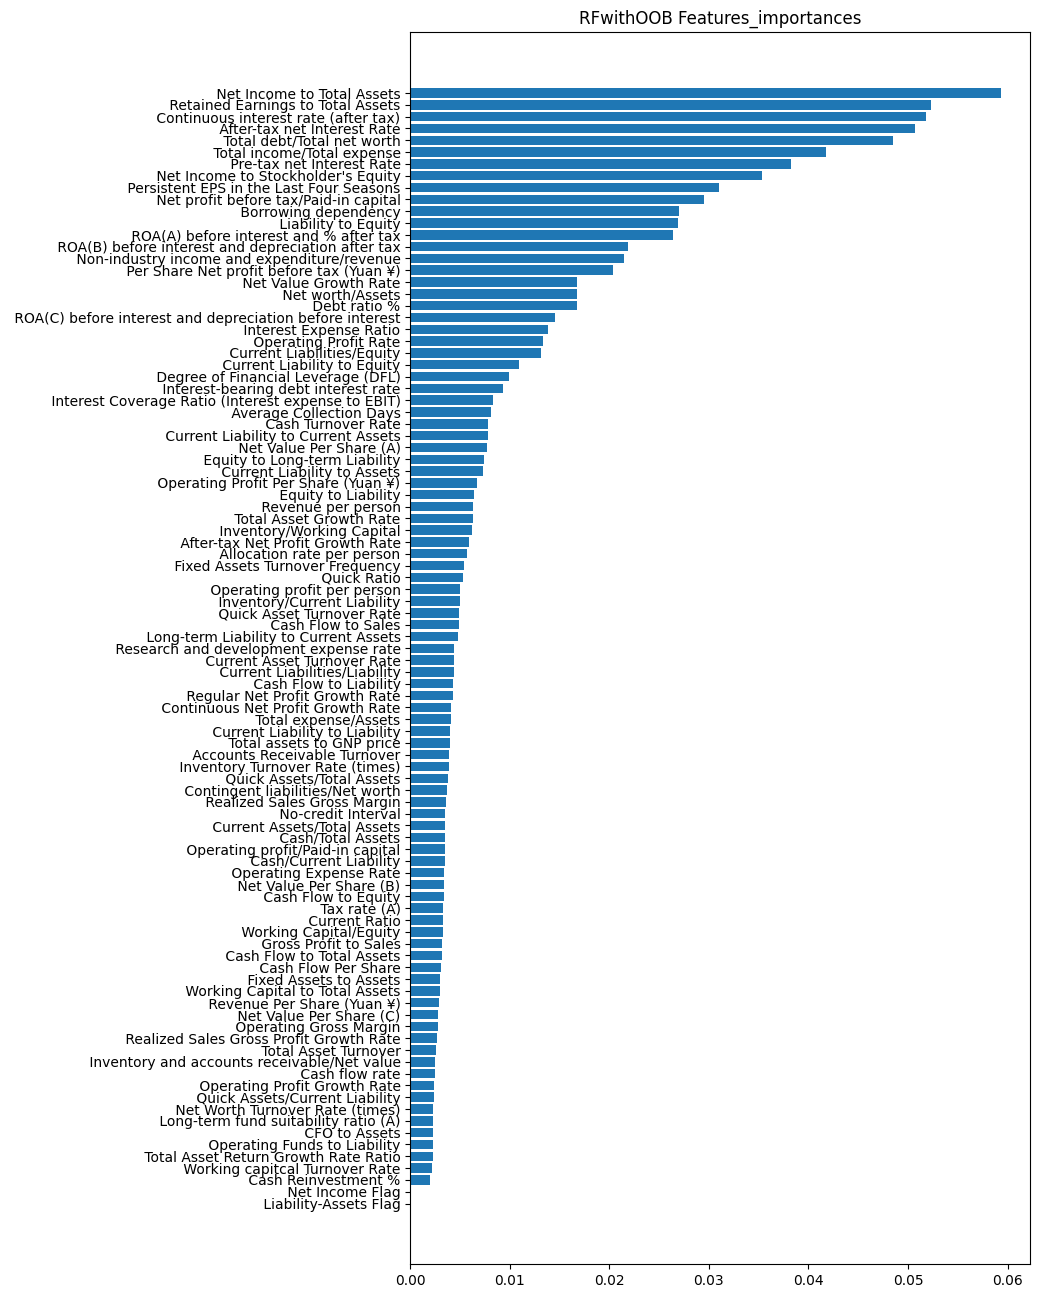

In [ ]:
importances = pd.Series(rf_modelwithOOB.feature_importances_)
features = rf_modelwithOOB.feature_names_in_
features_importances = sorted(zip(importances,features),reverse=True)
keys = [k[1] for k in features_importances ] [::-1]
values = [k[0] for k in features_importances ][::-1]
print(keys,'\n')
print(values,'\n')
print(features_importances,'\n')
fig, ax = plt.subplots(figsize=(8,16))
ax.barh(keys, values)
plt.title('RFwithOOB Features_importances')

In [ ]:
#Top 20 Importance Features using RFwithOOB
importances = pd.Series(rf_modelwithOOB.feature_importances_).nlargest(20)
importances

85    0.059304
67    0.052317
9     0.051832
7     0.050653
35    0.048510
68    0.041720
6     0.038276
89    0.035304
18    0.031008
42    0.029546
39    0.026962
90    0.026878
1     0.026420
2     0.021830
8     0.021426
22    0.020408
29    0.016744
37    0.016722
36    0.016722
0     0.014499
dtype: float64

Hyperparameters Tuning for RandomForest

In [ ]:
param_grid = {
    'n_estimators': [500,1000,1500,2000,2500,3000], 
    'max_depth': [200],
    #'min_samples_split': [2],
    #'min_samples_leaf': [2],
    #'max_features': [None]     
}

In [ ]:
grid_search_rf = GridSearchCV(rf_model,param_grid=param_grid,cv=5)
grid_search_rf.fit(X_train,y_train)
print(grid_search_rf.best_estimator_)

RandomForestClassifier(max_depth=200, n_estimators=2000, random_state=42)


In [ ]:
y_pred_grid_rf = grid_search_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_grid_rf))
print(classification_report(y_test, y_pred_grid_rf))

[[1270   43]
 [  24   27]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1313
           1       0.39      0.53      0.45        51

    accuracy                           0.95      1364
   macro avg       0.68      0.75      0.71      1364
weighted avg       0.96      0.95      0.95      1364



In [ ]:
Accuracy_rf_PTuning = grid_search_rf.score(X_train, y_train)
print(Accuracy_rf_PTuning, "\n")
AUC_rf_PTuning = roc_auc_score(y_test,y_pred_grid_rf)
print(AUC_rf_PTuning)

1.0 

0.7483311679584247


<Axes: >

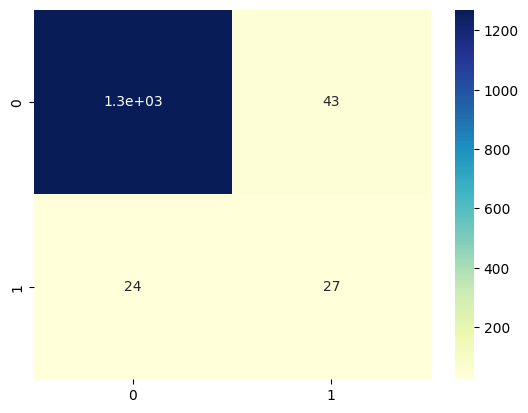

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_rf), annot=True, cmap="YlGnBu")

[' Net Income Flag', ' Liability-Assets Flag', ' Cash Reinvestment %', ' CFO to Assets', ' Working capitcal Turnover Rate', ' Total Asset Return Growth Rate Ratio', ' Net Worth Turnover Rate (times)', ' Operating Funds to Liability', ' Long-term fund suitability ratio (A)', ' Realized Sales Gross Profit Growth Rate', ' Working Capital/Equity', ' Cash flow rate', ' Working Capital to Total Assets', ' Inventory and accounts receivable/Net value', ' Operating Profit Growth Rate', ' Cash Flow Per Share', ' Fixed Assets to Assets', ' Revenue Per Share (Yuan ¥)', ' Gross Profit to Sales', ' Total Asset Turnover', ' No-credit Interval', ' Realized Sales Gross Margin', ' Operating Gross Margin', ' Quick Assets/Current Liability', ' Current Ratio', ' Cash/Current Liability', ' Operating Expense Rate', ' Contingent liabilities/Net worth', ' Cash Flow to Equity', ' Current Assets/Total Assets', ' Continuous Net Profit Growth Rate', ' Tax rate (A)', ' Regular Net Profit Growth Rate', ' Cash Flow t

Text(0.5, 1.0, 'RF Hyperparameter Tuning Features_importances')

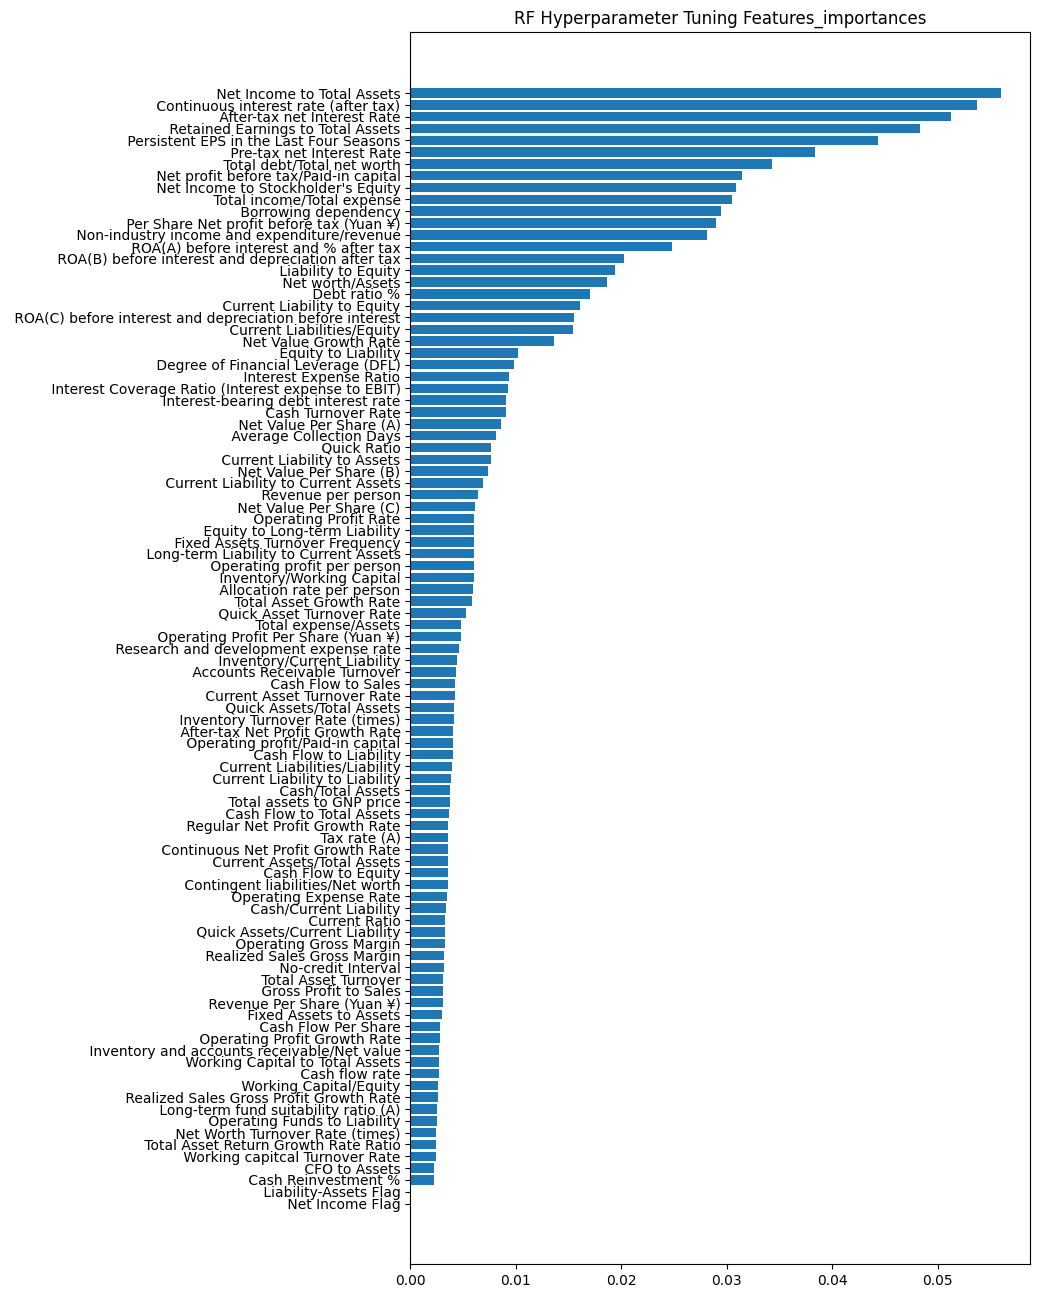

In [ ]:
importances = pd.Series(grid_search_rf.best_estimator_.feature_importances_)
features = grid_search_rf.best_estimator_.feature_names_in_
features_importances = sorted(zip(importances,features),reverse=True)
keys = [k[1] for k in features_importances ] [::-1]
values = [k[0] for k in features_importances ][::-1]
print(keys,'\n')
print(values,'\n')
print(features_importances,'\n')
fig, ax = plt.subplots(figsize=(8,16))
ax.barh(keys, values)
plt.title('RF Hyperparameter Tuning Features_importances')

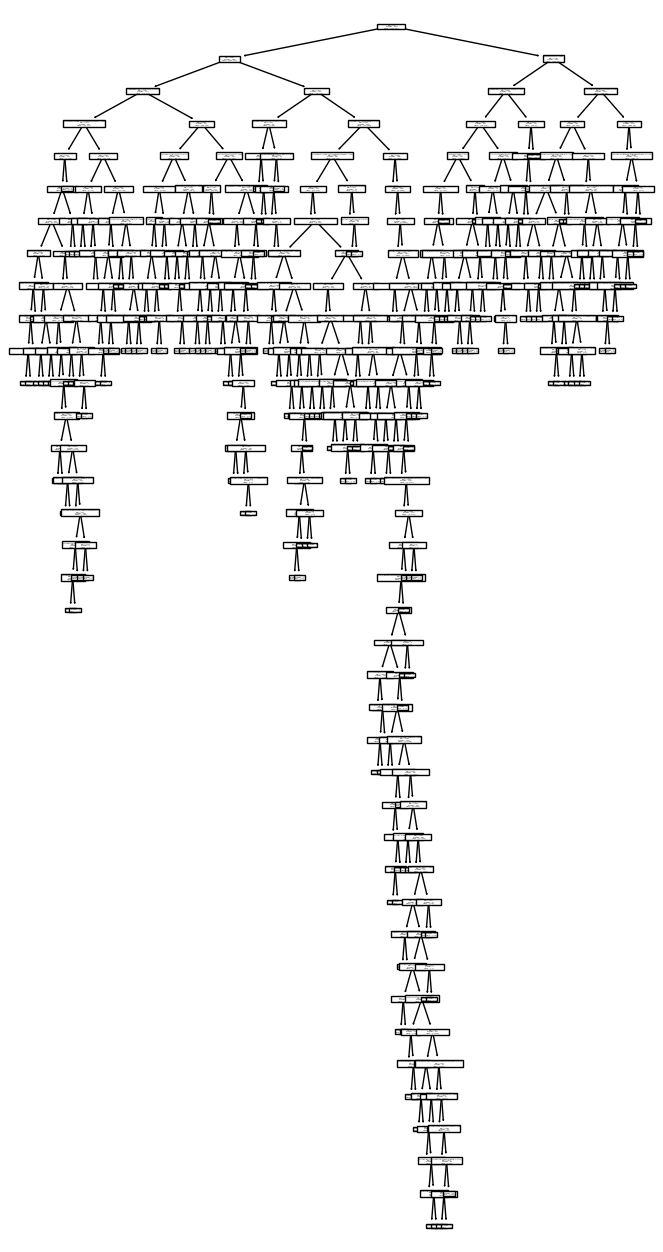

In [ ]:
fig, ax = plt.subplots(figsize=(8,16))
plot_tree(grid_search_rf.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

In [35]:
grid_search_rfwithOOB = GridSearchCV(rf_modelwithOOB,param_grid=param_grid,cv=5)
grid_search_rfwithOOB.fit(X_train,y_train)
print(grid_search_rfwithOOB.best_estimator_)

RandomForestClassifier(max_depth=200, n_estimators=2000, oob_score=True,
                       random_state=42)


In [36]:
y_pred_grid_rfwithOOB = grid_search_rfwithOOB.predict(X_test)
print(confusion_matrix(y_test, y_pred_grid_rfwithOOB))
print(classification_report(y_test, y_pred_grid_rfwithOOB))

[[1270   43]
 [  24   27]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1313
           1       0.39      0.53      0.45        51

    accuracy                           0.95      1364
   macro avg       0.68      0.75      0.71      1364
weighted avg       0.96      0.95      0.95      1364



In [37]:
Accuracy_rf_OOB_PTuning = grid_search_rfwithOOB.score(X_train, y_train)
print(Accuracy_rf_OOB_PTuning, "\n")
AUC_rf_OOB_PTuning = roc_auc_score(y_test,y_pred_grid_rfwithOOB)
print(AUC_rf_OOB_PTuning)

1.0 

0.7483311679584247


<Axes: >

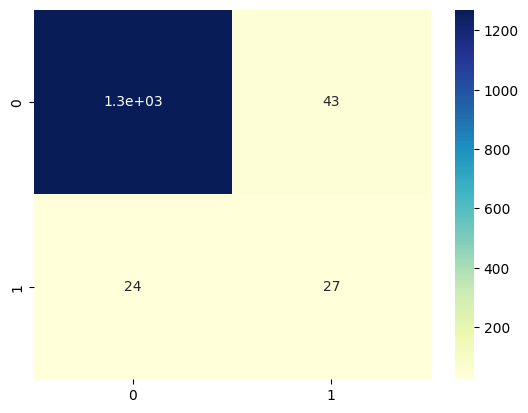

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_rfwithOOB), annot=True, cmap="YlGnBu")

[' Net Income Flag', ' Liability-Assets Flag', ' Cash Reinvestment %', ' CFO to Assets', ' Working capitcal Turnover Rate', ' Total Asset Return Growth Rate Ratio', ' Net Worth Turnover Rate (times)', ' Operating Funds to Liability', ' Long-term fund suitability ratio (A)', ' Realized Sales Gross Profit Growth Rate', ' Working Capital/Equity', ' Cash flow rate', ' Working Capital to Total Assets', ' Inventory and accounts receivable/Net value', ' Operating Profit Growth Rate', ' Cash Flow Per Share', ' Fixed Assets to Assets', ' Revenue Per Share (Yuan ¥)', ' Gross Profit to Sales', ' Total Asset Turnover', ' No-credit Interval', ' Realized Sales Gross Margin', ' Operating Gross Margin', ' Quick Assets/Current Liability', ' Current Ratio', ' Cash/Current Liability', ' Operating Expense Rate', ' Contingent liabilities/Net worth', ' Cash Flow to Equity', ' Current Assets/Total Assets', ' Continuous Net Profit Growth Rate', ' Tax rate (A)', ' Regular Net Profit Growth Rate', ' Cash Flow t

Text(0.5, 1.0, 'RFwithOOB Hyperparameter Tuning Features_importances')

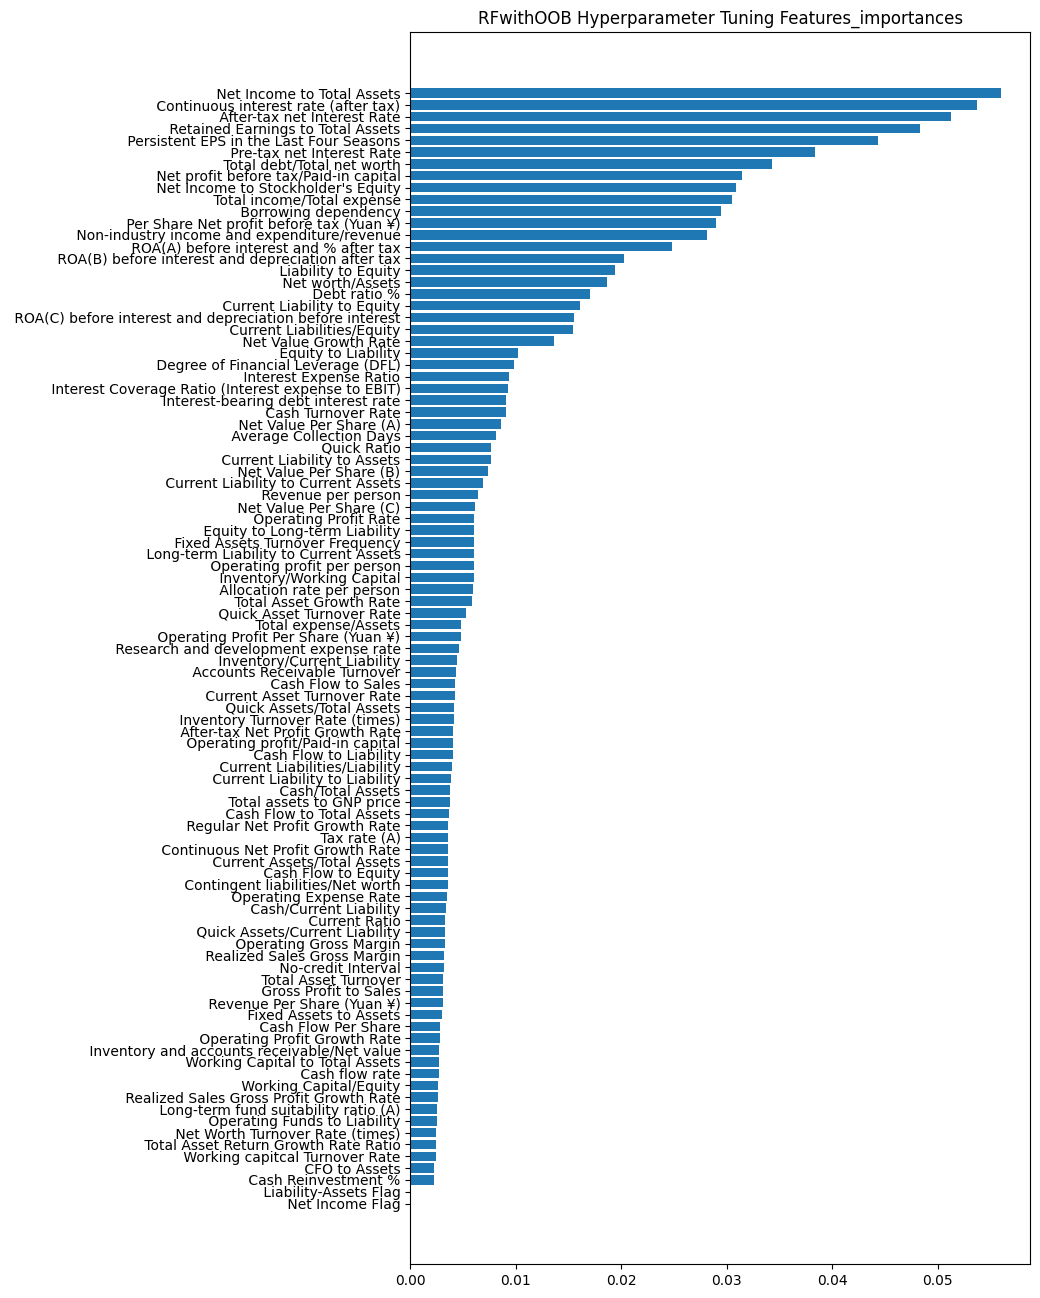

In [39]:
importances = pd.Series(grid_search_rfwithOOB.best_estimator_.feature_importances_)
features = grid_search_rfwithOOB.best_estimator_.feature_names_in_
features_importances = sorted(zip(importances,features),reverse=True)
keys = [k[1] for k in features_importances ] [::-1]
values = [k[0] for k in features_importances ][::-1]
print(keys,'\n')
print(values,'\n')
print(features_importances,'\n')
fig, ax = plt.subplots(figsize=(8,16))
ax.barh(keys, values)
plt.title('RFwithOOB Hyperparameter Tuning Features_importances')

###Machine Learning Models

2.   Support Vector Machine SVM


In [40]:
sv_classifier = svm.SVC()
sv_classifier.fit(X_train,y_train)

SVC()

In [41]:
y_pred_svm = sv_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[1008  305]
 [  23   28]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1313
           1       0.08      0.55      0.15        51

    accuracy                           0.76      1364
   macro avg       0.53      0.66      0.50      1364
weighted avg       0.94      0.76      0.83      1364



In [ ]:
Accuracy_svm = sv_classifier.score(X_train, y_train)
print(Accuracy_svm, "\n")
AUC_svm = roc_auc_score(y_test,y_pred_svm)
print(AUC_svm)

<Axes: >

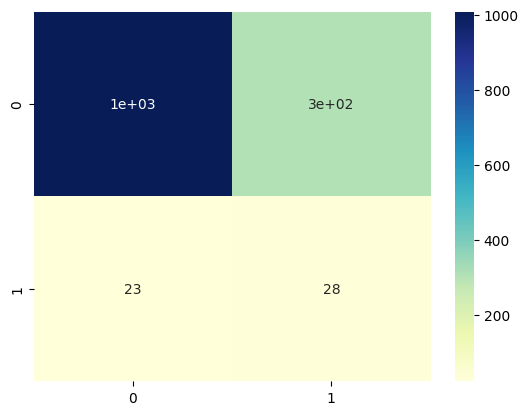

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="YlGnBu")

Hyperparameter Tuning for Support Vector Machine SVM

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
hyperparameters = {'kernel': ['linear'],
                   #'C': [0.01],
                   #'gamma': [0.01]
                   }

In [ ]:
grid_search = GridSearchCV(sv_classifier, hyperparameters)
grid_search.fit(X_train_scaled, y_train)

In [ ]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

In [ ]:
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show()